# Dog Breed

## Data exploration

In [16]:
import csv
import matplotlib.pylab as plt

In [7]:
image_label = {}
with open('dataset/labels.csv') as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    for row in reader:
        image_name = row[0]
        label = row[1]
        
        if label == 'breed':
            continue
        
        if label not in image_label:
            image_label[label] = set()
            
        image_label[label].add(image_name)


# sorted_dict = sorted(image_label.keys())
# print(sorted_dict)
    

boston_bull 87
dingo 80
pekinese 75
bluetick 85
golden_retriever 67
bedlington_terrier 89
borzoi 75
basenji 110
scottish_deerhound 126
shetland_sheepdog 76
walker_hound 69
maltese_dog 117
norfolk_terrier 83
african_hunting_dog 86
wire-haired_fox_terrier 82
redbone 72
lakeland_terrier 99
boxer 75
doberman 74
otterhound 69
standard_schnauzer 72
irish_water_spaniel 78
black-and-tan_coonhound 77
cairn 106
affenpinscher 80
labrador_retriever 84
ibizan_hound 91
english_setter 83
weimaraner 85
giant_schnauzer 69
groenendael 82
dhole 76
toy_poodle 80
border_terrier 91
tibetan_terrier 107
norwegian_elkhound 95
shih-tzu 112
irish_terrier 82
kuvasz 71
german_shepherd 69
greater_swiss_mountain_dog 82
basset 82
australian_terrier 102
schipperke 86
rhodesian_ridgeback 88
irish_setter 88
appenzeller 78
bloodhound 85
samoyed 109
miniature_schnauzer 78
brittany_spaniel 73
kelpie 86
papillon 96
border_collie 72
entlebucher 115
collie 87
malamute 81
welsh_springer_spaniel 79
chihuahua 71
saluki 99
pug 94

[('affenpinscher', 80), ('afghan_hound', 116), ('african_hunting_dog', 86), ('airedale', 107), ('american_staffordshire_terrier', 74), ('appenzeller', 78), ('australian_terrier', 102), ('basenji', 110), ('basset', 82), ('beagle', 105), ('bedlington_terrier', 89), ('bernese_mountain_dog', 114), ('black-and-tan_coonhound', 77), ('blenheim_spaniel', 102), ('bloodhound', 85), ('bluetick', 85), ('border_collie', 72), ('border_terrier', 91), ('borzoi', 75), ('boston_bull', 87), ('bouvier_des_flandres', 86), ('boxer', 75), ('brabancon_griffon', 67), ('briard', 66), ('brittany_spaniel', 73), ('bull_mastiff', 75), ('cairn', 106), ('cardigan', 76), ('chesapeake_bay_retriever', 83), ('chihuahua', 71), ('chow', 93), ('clumber', 80), ('cocker_spaniel', 74), ('collie', 87), ('curly-coated_retriever', 72), ('dandie_dinmont', 89), ('dhole', 76), ('dingo', 80), ('doberman', 74), ('english_foxhound', 86), ('english_setter', 83), ('english_springer', 75), ('entlebucher', 115), ('eskimo_dog', 66), ('flat-

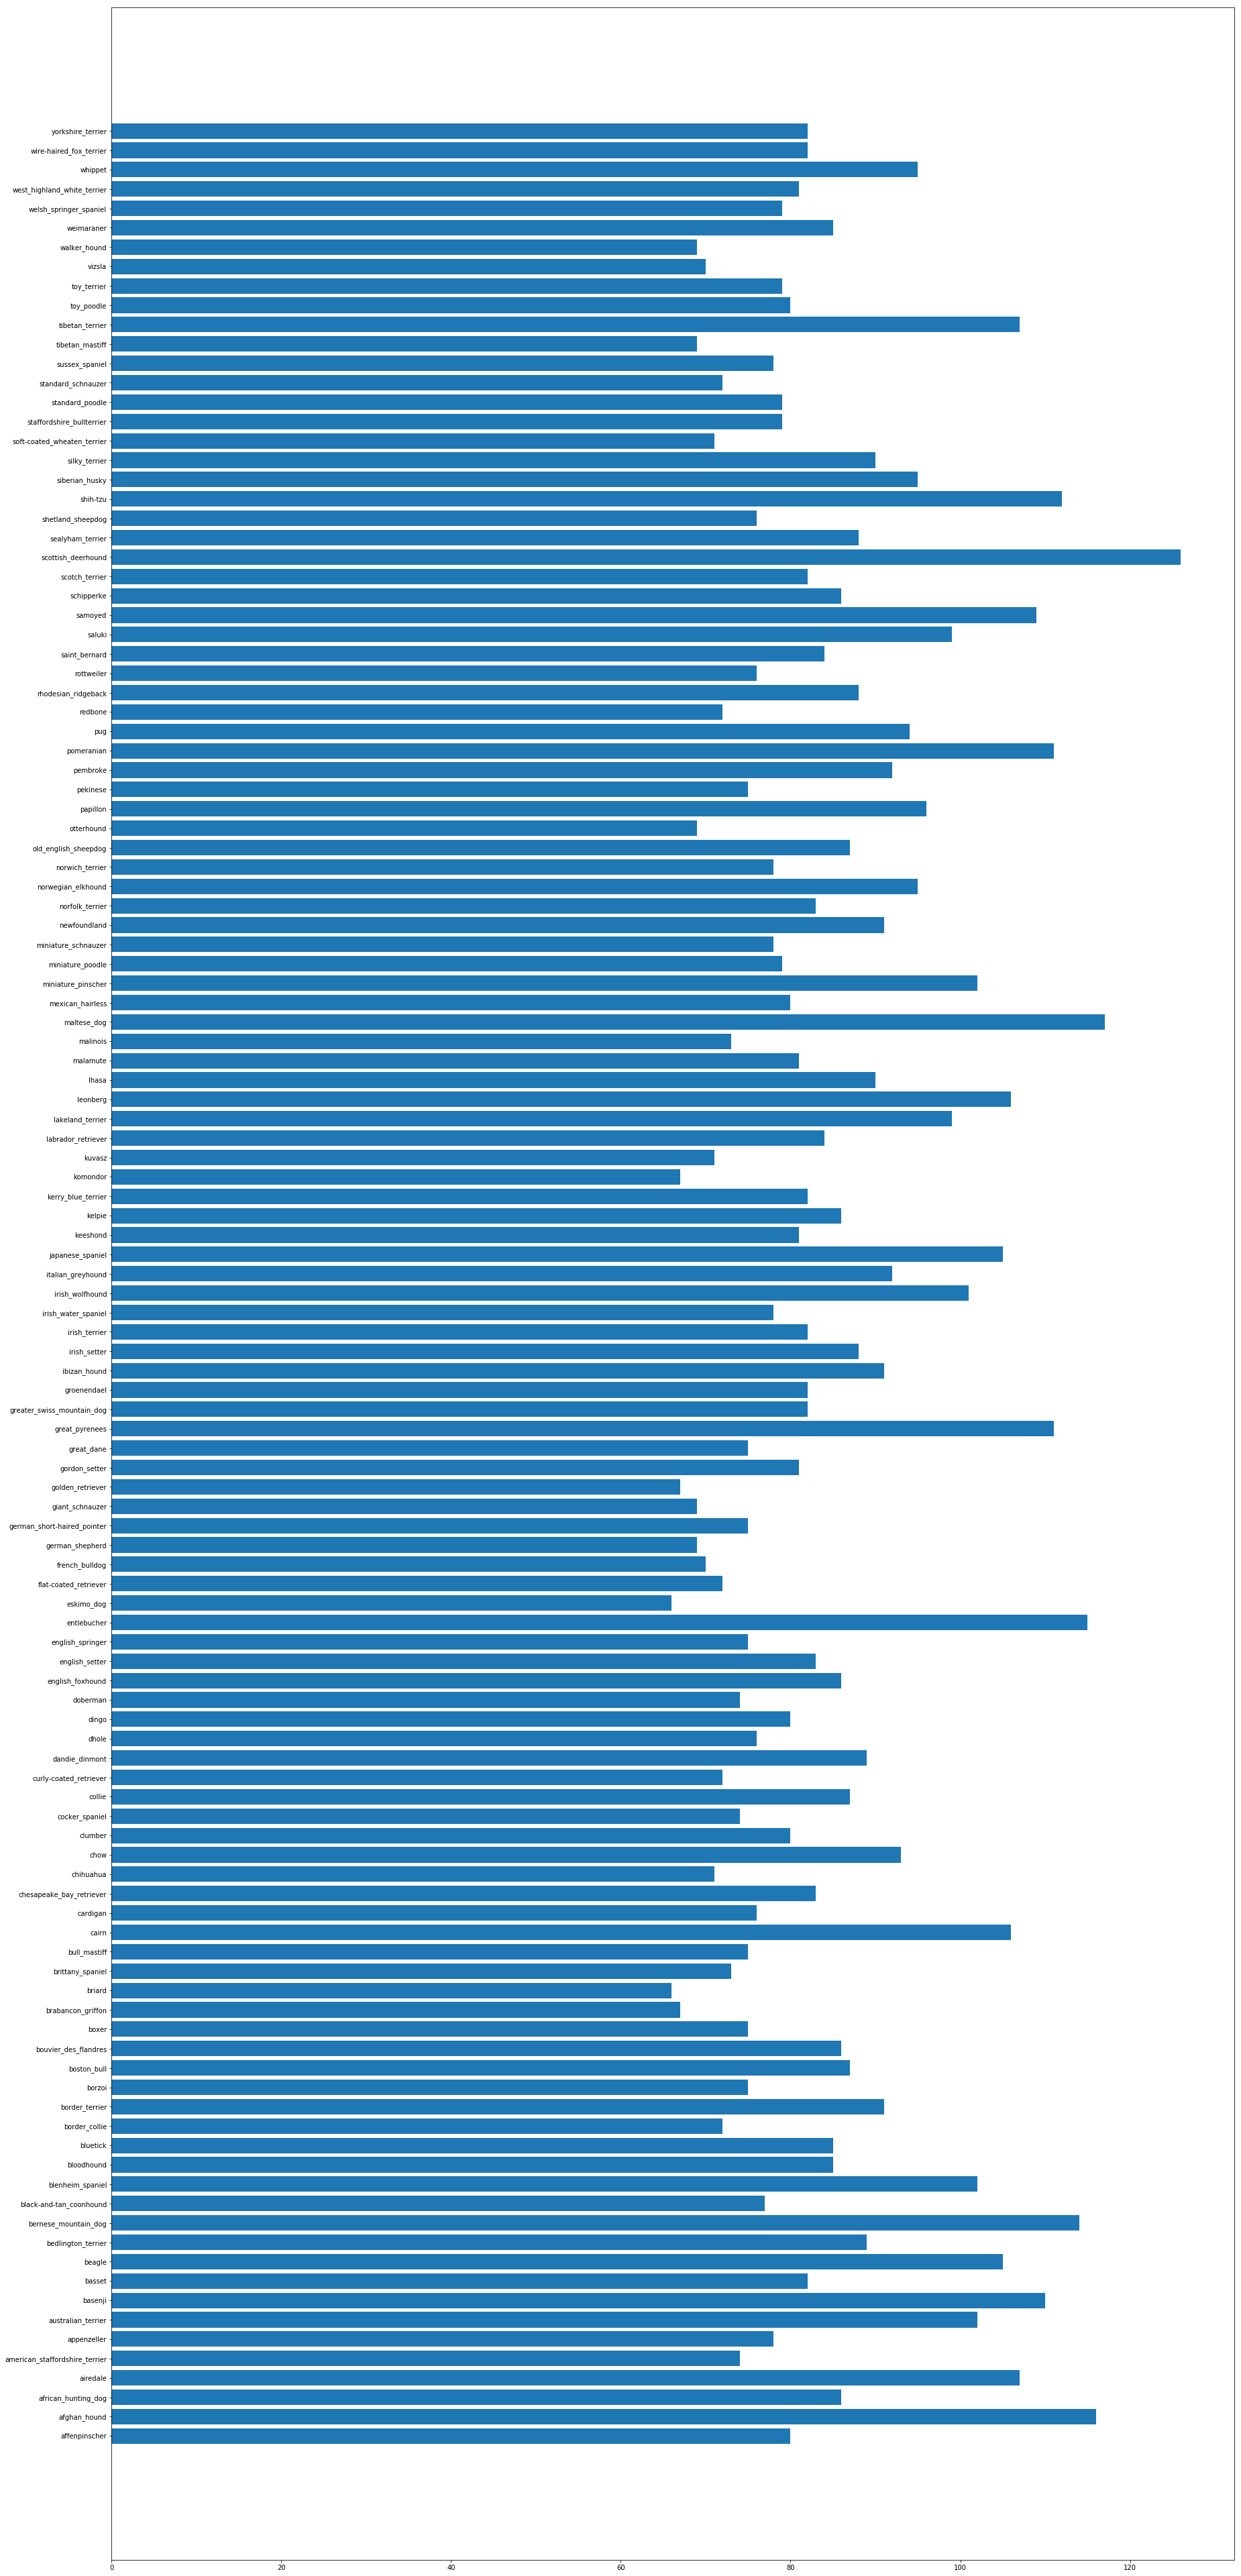

In [37]:
label_dist = {}
for k,v in image_label.items():
    label_dist[k] = len(v)

sorted_image_label = sorted(label_dist.items()) # sorted by key, return a list of tuples

print(sorted_image_label)

l, c = list(label_dist.keys()), list(label_dist.values())


plt.figure(figsize=(30,70))
plt.barh(l,c)
 
plt.show()


In [12]:
import os
from keras.applications.resnet50 import ResNet50
import numpy as np

In [2]:
def get_test_label(path):
    labels = []
    for foldername in os.listdir(path):
#         print(foldername)
        if foldername != '.DS_Store':
            names = foldername.split('-')
            l = len(names)
            label = names[1]
            for i in range(2,l):
                label += '-' + names[i]
            labels.append(label)
    return labels

In [3]:
labels = get_test_label('Images')
labels.sort()
print(labels)

['Afghan_hound', 'African_hunting_dog', 'Airedale', 'American_Staffordshire_terrier', 'Appenzeller', 'Australian_terrier', 'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie', 'Border_terrier', 'Boston_bull', 'Bouvier_des_Flandres', 'Brabancon_griffon', 'Brittany_spaniel', 'Cardigan', 'Chesapeake_Bay_retriever', 'Chihuahua', 'Dandie_Dinmont', 'Doberman', 'English_foxhound', 'English_setter', 'English_springer', 'EntleBucher', 'Eskimo_dog', 'French_bulldog', 'German_shepherd', 'German_short-haired_pointer', 'Gordon_setter', 'Great_Dane', 'Great_Pyrenees', 'Greater_Swiss_Mountain_dog', 'Ibizan_hound', 'Irish_setter', 'Irish_terrier', 'Irish_water_spaniel', 'Irish_wolfhound', 'Italian_greyhound', 'Japanese_spaniel', 'Kerry_blue_terrier', 'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa', 'Maltese_dog', 'Mexican_hairless', 'Newfoundland', 'Norfolk_terrier', 'Norwegian_elkhound', 'Norwich_terrier', 'Old_English_sheepdog', 'Pekinese', 'Pembroke', 'Po

In [7]:
import PIL

In [10]:
#all/train
def image_size(train_dir):
    width = []
    height = []
    for image_dir in os.listdir(train_dir):
        if image_dir != '.DS_Store':
            image = PIL.Image.open(train_dir + '/' + image_dir)
            width.append(image.size[0])
            height.append(image.size[1])
    return width,height

In [11]:
width,height = image_size('all/train')

97
3264


In [13]:
print(np.mean(width))

443.33153981608297


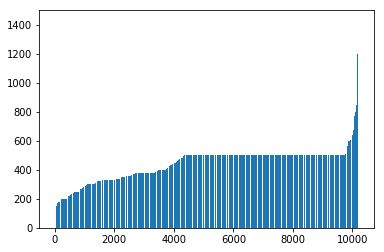

In [23]:
width.sort()
l, c = list(range(len(width))), width
plt.ylim(0,1500)
# plt.figure(figsize=(30,70))
plt.bar(l,c)
plt.show()

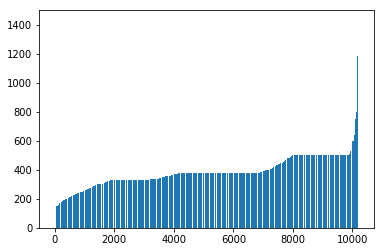

In [25]:
height.sort()
l, c = list(range(len(height))), height
plt.ylim(0,1500)
# plt.figure(figsize=(30,70))
plt.bar(l,c)
plt.show()